In [1]:
import pandas as pd

dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv")

dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
troca = {
    0 : 1,
    1 : 0
}
dados['finished'] = dados.unfinished.map(troca)
dados.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [3]:
dados.tail()

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

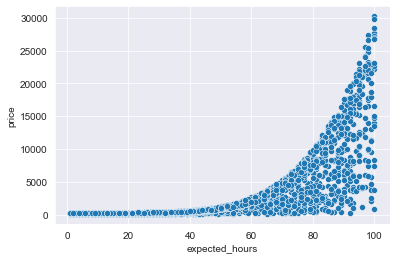

In [4]:
import seaborn as sns

sns.scatterplot(x='expected_hours', y='price', data=dados)

<AxesSubplot:xlabel='expected_hours', ylabel='price'>

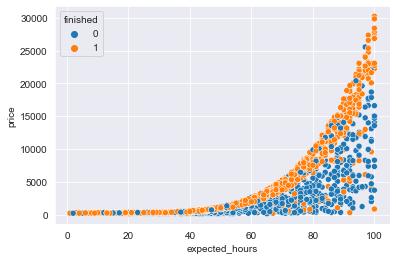

In [5]:
sns.scatterplot(x='expected_hours', y='price', data=dados, hue='finished')

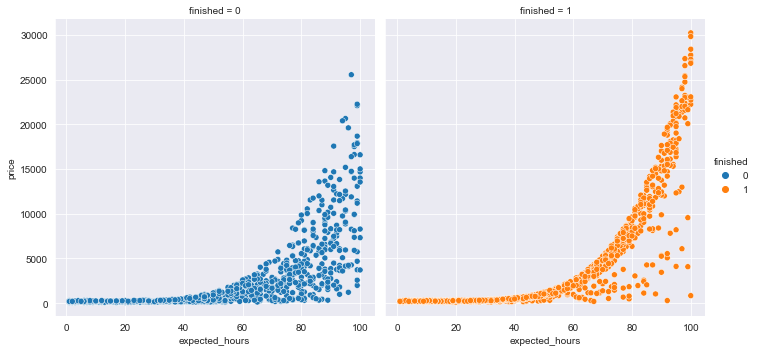

In [6]:
sns.relplot(x="expected_hours", y="price", hue="finished",  col="finished", data=dados)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[['expected_hours', 'price']]
y = dados['finished']

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 52.96%


C:\Users\leona\Desktop\Python\Machine Learning\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
import numpy as np

previsoes = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes) * 100
acuracia

52.59259259259259